In [1]:
import numpy as np  
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')
import cv2
import glob

In [21]:
path_No = 'brain_tumor_dataset/no/*'
path_Yes = 'brain_tumor_dataset/yes/*'

tumor = []
no_tumor = []

In [22]:
random_state = 42

for file in glob.iglob(path_Yes):
    img = cv2.imread(file)      
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)        
    img = cv2.resize(img, (224, 224)) 
    tumor.append((img, 1)) 

In [23]:
for file in glob.iglob(path_No):
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    no_tumor.append((img, 0)) 

In [26]:
print('Tumor:', len(tumor))
print('No Tumor:', len(no_tumor))

all_data = tumor + no_tumor
data = np.array([item[0] for item in all_data])
labels = np.array([item[1] for item in all_data])

Tumor: 155
No Tumor: 98


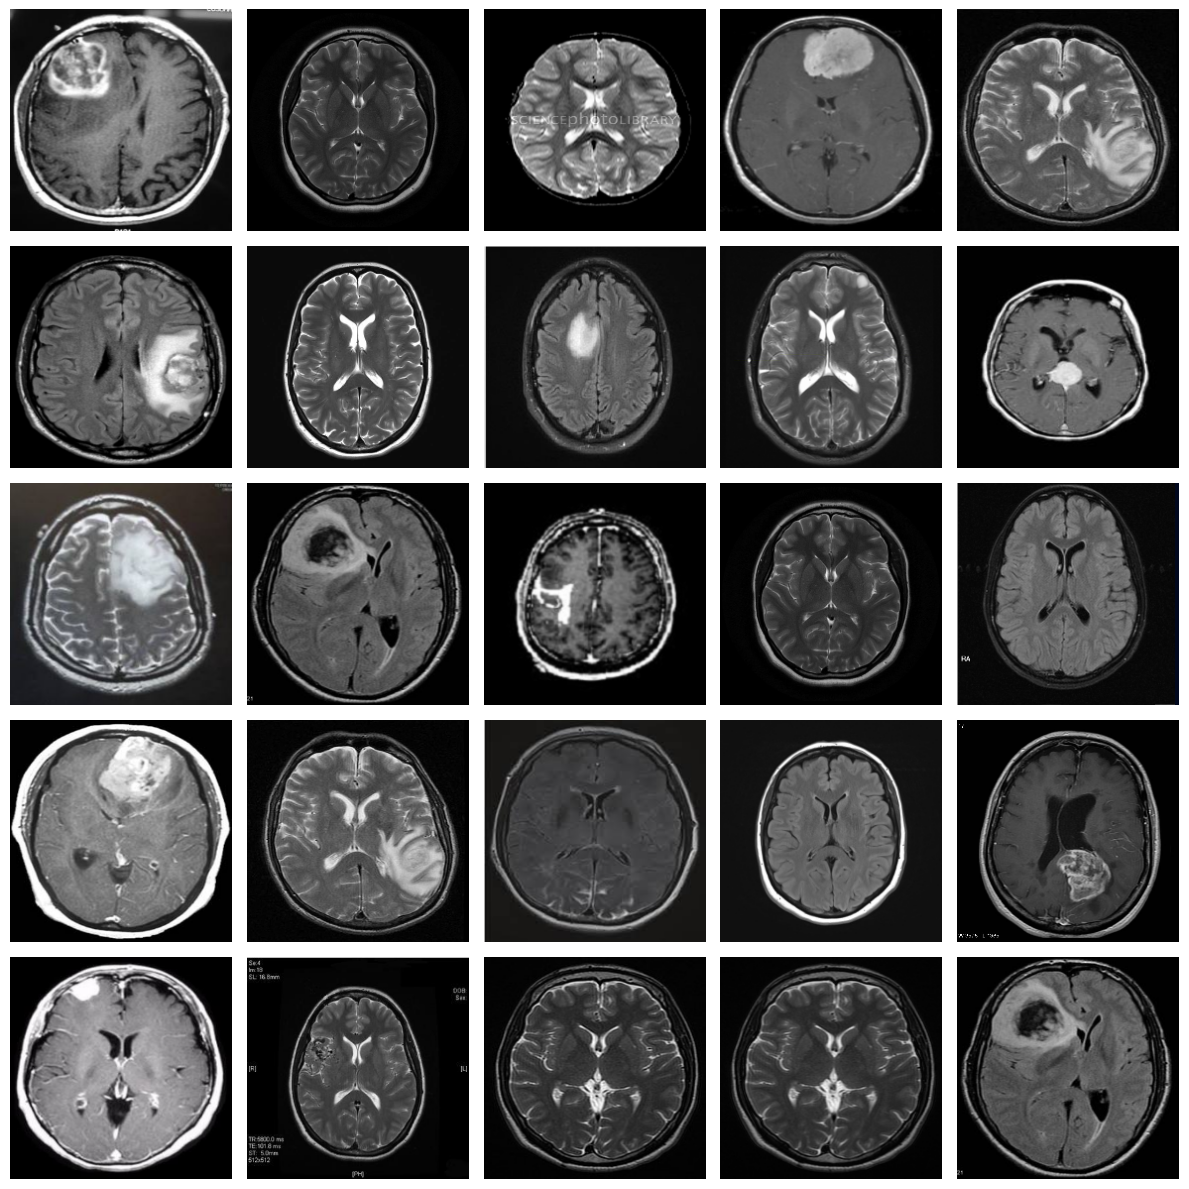

In [29]:
# Visualizing a Grid of Random Images
import matplotlib.pyplot as plt
import numpy as np

# Define number of rows and columns for the grid
num_rows = 5
num_cols = 5

# Randomly select indices for images
image_indices = np.random.randint(0, len(data), size=num_rows * num_cols)

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

# Plot random images
for i in range(num_rows):
  for j in range(num_cols):
    index = image_indices[i * num_cols + j]
    axes[i, j].imshow(data[index])
    axes[i, j].axis('off')

plt.tight_layout()
plt.show()

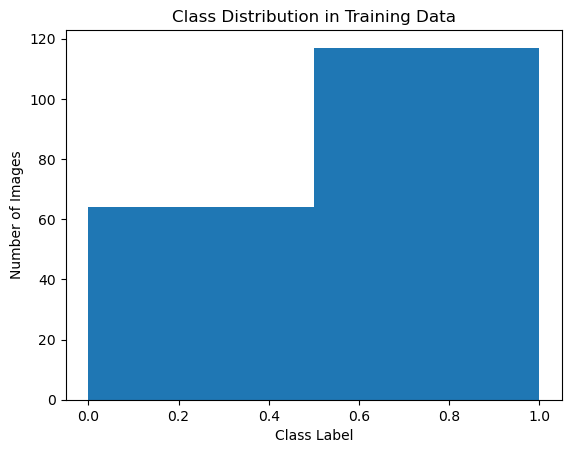

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=random_state)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=random_state)

X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

plt.hist(y_train, bins=2)  # Bins for tumor (1) and no tumor (0)
plt.xlabel('Class Label')
plt.ylabel('Number of Images')
plt.title('Class Distribution in Training Data')
plt.show()

In [33]:
from tensorflow import keras

model = keras.Sequential([
  keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
  keras.layers.MaxPooling2D((2, 2)),
  keras.layers.Conv2D(64, (3, 3), activation='relu'),
  keras.layers.MaxPooling2D((2, 2)),
  keras.layers.Flatten(),
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10


6/6 [==============================] - 5s 581ms/step - loss: 2.7233 - accuracy: 0.6188 - val_loss: 0.8723 - val_accuracy: 0.6667
Epoch 2/10
6/6 [==============================] - 3s 537ms/step - loss: 0.6588 - accuracy: 0.7127 - val_loss: 0.5799 - val_accuracy: 0.8095
Epoch 3/10
6/6 [==============================] - 3s 515ms/step - loss: 0.4591 - accuracy: 0.8066 - val_loss: 0.5273 - val_accuracy: 0.8095
Epoch 4/10
6/6 [==============================] - 3s 505ms/step - loss: 0.3756 - accuracy: 0.8564 - val_loss: 0.6128 - val_accuracy: 0.8095
Epoch 5/10
6/6 [==============================] - 3s 499ms/step - loss: 0.2691 - accuracy: 0.8895 - val_loss: 0.6202 - val_accuracy: 0.7619
Epoch 6/10
6/6 [==============================] - 3s 518ms/step - loss: 0.1925 - accuracy: 0.9227 - val_loss: 0.6145 - val_accuracy: 0.7619
Epoch 7/10
6/6 [==============================] - 3s 520ms/step - loss: 0.1256 - accuracy: 0.9503 - val_loss: 0.5536 - val_accuracy: 0.8095
Epoch 8/10
6/6 [==

In [60]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model

# Define input shape (assuming your images are 224x224 with 3 channels)
input_shape = (224, 224, 3)

# Define the model layers
inputs = Input(shape=input_shape)  # Input layer

# Feature extraction layers
x = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(inputs)  # Convolutional layer 1
x = MaxPooling2D(pool_size=(2, 2))(x)  # Max pooling layer 1
x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(x)  # Convolutional layer 2
x = MaxPooling2D(pool_size=(2, 2))(x)  # Max pooling layer 2

# Flatten the feature maps
x = Flatten()(x)

# Classification layers
x = Dense(units=128, activation='relu')(x)  # Fully connected layer 1
outputs = Dense(units=1, activation='sigmoid')(x)  # Output layer with sigmoid for binary classification
                        
# Create the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model (replace with your training data)
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
6/6 [==============================] - 6s 769ms/step - loss: 1.5866 - accuracy: 0.6133 - val_loss: 0.5329 - val_accuracy: 0.7647
Epoch 2/10
6/6 [==============================] - 4s 688ms/step - loss: 0.4537 - accuracy: 0.8122 - val_loss: 0.5325 - val_accuracy: 0.7843
Epoch 3/10
6/6 [==============================] - 4s 718ms/step - loss: 0.3517 - accuracy: 0.8453 - val_loss: 0.5273 - val_accuracy: 0.8039
Epoch 4/10
6/6 [==============================] - 4s 674ms/step - loss: 0.2204 - accuracy: 0.9061 - val_loss: 0.4690 - val_accuracy: 0.8235
Epoch 5/10
6/6 [==============================] - 4s 695ms/step - loss: 0.1185 - accuracy: 0.9945 - val_loss: 0.4811 - val_accuracy: 0.8627
Epoch 6/10
6/6 [==============================] - 4s 677ms/step - loss: 0.0447 - accuracy: 0.9945 - val_loss: 0.6997 - val_accuracy: 0.8039
Epoch 7/10
6/6 [==============================] - 4s 671ms/step - loss: 0.0262 - accuracy: 0.9945 - val_loss: 0.9166 - val_accuracy: 0.7451
Epoch 8/10
6/6 [====

In [61]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

2/2 [==============================] - 0s 75ms/step - loss: 0.7342 - accuracy: 0.7647
Test Loss: 0.7342164516448975
Test Accuracy: 0.7647058963775635


In [62]:
# Train your model (replace with your training data and model)
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Extract training and validation loss/accuracy from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot training and validation loss/accuracy
epochs = range(len(train_loss))  # Get number of epochs
plt.figure(figsize=(10, 6))

Epoch 1/10
6/6 [==============================] - 5s 750ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.7133 - val_accuracy: 0.7647
Epoch 2/10
6/6 [==============================] - 4s 722ms/step - loss: 9.1300e-04 - accuracy: 1.0000 - val_loss: 0.8811 - val_accuracy: 0.7255
Epoch 3/10
6/6 [==============================] - 4s 677ms/step - loss: 4.0096e-04 - accuracy: 1.0000 - val_loss: 1.0423 - val_accuracy: 0.7255
Epoch 4/10
6/6 [==============================] - 4s 683ms/step - loss: 2.9666e-04 - accuracy: 1.0000 - val_loss: 1.0437 - val_accuracy: 0.7255
Epoch 5/10
6/6 [==============================] - 4s 680ms/step - loss: 1.8519e-04 - accuracy: 1.0000 - val_loss: 1.0080 - val_accuracy: 0.7255
Epoch 6/10
6/6 [==============================] - 4s 685ms/step - loss: 1.4634e-04 - accuracy: 1.0000 - val_loss: 0.9997 - val_accuracy: 0.7255
Epoch 7/10
6/6 [==============================] - 4s 671ms/step - loss: 1.2815e-04 - accuracy: 1.0000 - val_loss: 1.0193 - val_accuracy: 0.7

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

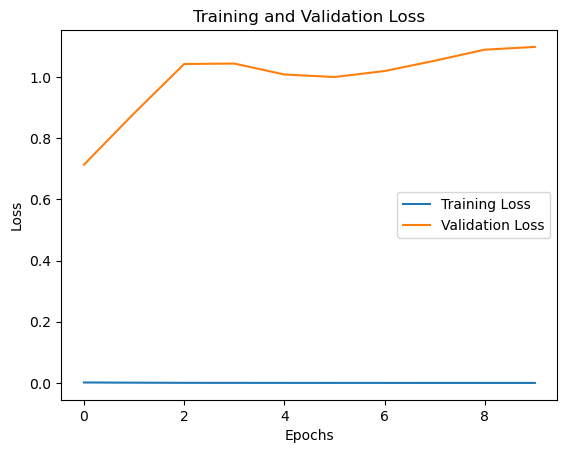

<Figure size 1000x600 with 0 Axes>

In [63]:
# Plot loss
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure(figsize=(10, 6))

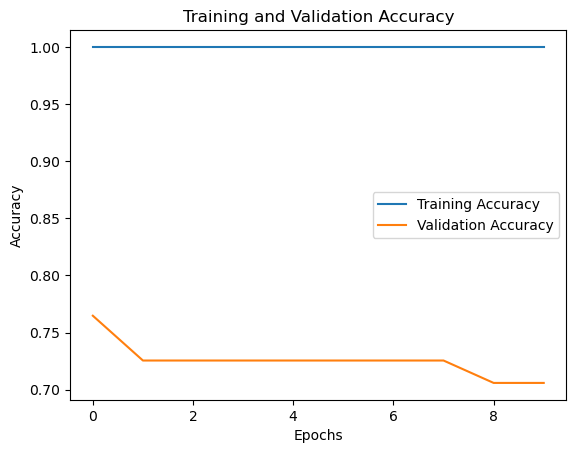

In [64]:
# Plot accuracy
plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()